## Import Libraries

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler





## Load Dataset

In [2]:
# fetching dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

# variable information 
print(iris.variables) 




           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


## Dataset Overview

In [ ]:
# Basic dataset overview
print("Dataset Overview:")
print(f"Number of observations: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature columns: {list(X.columns)}")
print(f"Target column: {y.columns[0]}")


Dataset Overview:
Number of observations: 150
Number of features: 4
Feature columns: ['sepal length', 'sepal width', 'petal length', 'petal width']
Target column: class


In [1]:
# Class distribution 
class_counts = y[y.columns[0]].value_counts()
class_proportions = class_counts / y.shape[0]

# printing class distribution 
print("Class Distribution:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} observations ({class_proportions[cls]:.2%})")

NameError: name 'y' is not defined

In [12]:
# Summary statistics for features
print("Feature Summary Statistics:")
print(X.describe())

Feature Summary Statistics:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Verifying data types
display(X.dtypes)
display(y.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

class    object
dtype: object

Findings:
- The dataset contains a total of 150 observations, with an equal distribution across the three classes (50 observations per class)
- There are four feature variables: sepal length, sepal width, petal length, and petal width 
- There are no missing values 
- Petal dimensions show a wider range and greater variability compared to sepal dimensions, indicating more diversity in petal sizes among samples
- The relatively close median and mean values for each feature suggest that the distributions might be roughly symmetric, though there could be slight skew due to some minimum and maximum values, particularly for petal length

In [3]:
y = y.values.ravel()

In [15]:
display(y)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Exploratory Data Analysis

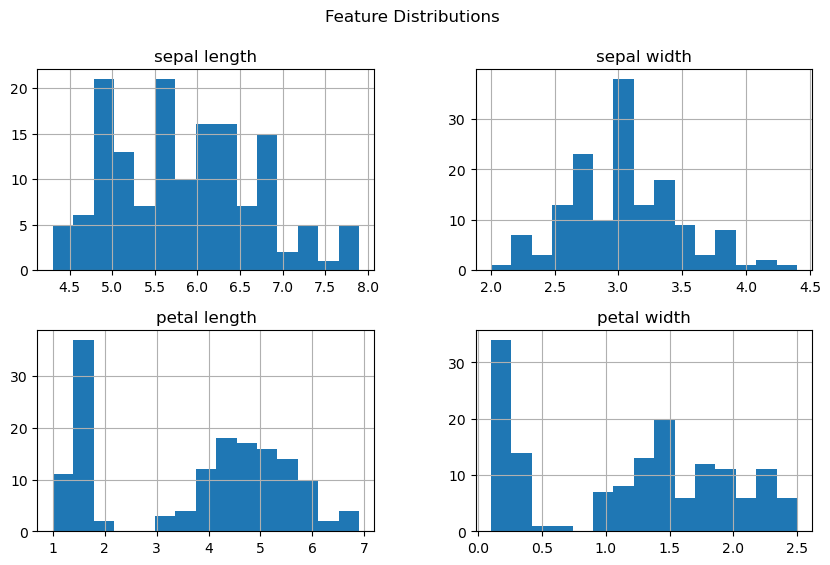

In [5]:
X.hist(bins=15, figsize=(10, 6))
plt.suptitle('Feature Distributions')
plt.show()

In [6]:
X_log = np.log(X)


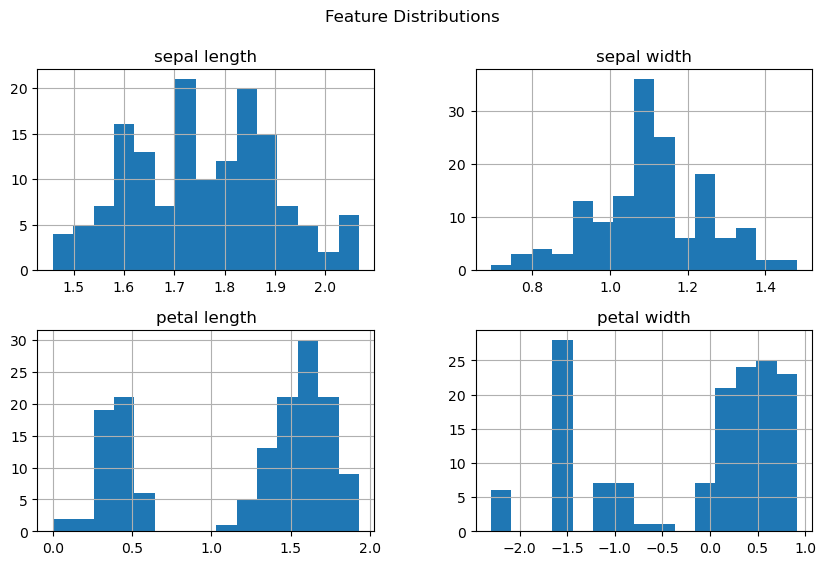

In [7]:
X_log.hist(bins=15, figsize=(10, 6))
plt.suptitle('Feature Distributions')
plt.show()

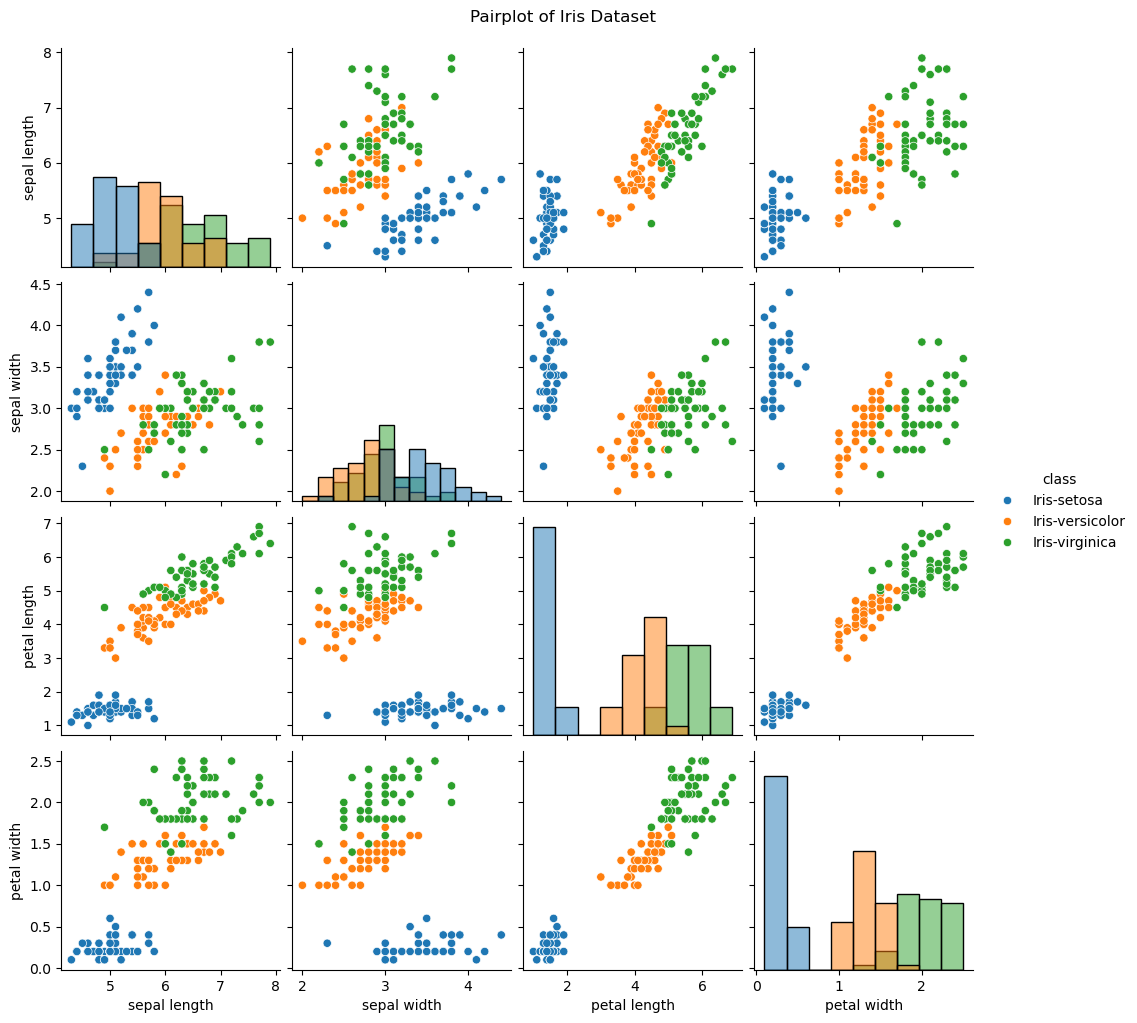

In [16]:
import seaborn as sns
sns.pairplot(pd.concat([X, y], axis=1), hue=y.columns[0], diag_kind="hist")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

## Machine Learning Methods

In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [9]:
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X) 

In [20]:
display(X_train.describe())
display(X_test.describe())

,sepal length,sepal width,petal length,petal width
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.057500,3.727500,1.182500
std,0.823805,0.446398,1.751252,0.753442
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


,sepal length,sepal width,petal length,petal width
count,30.000000,30.000000,30.000000,30.000000
mean,5.980000,3.040000,3.883333,1.263333
std,0.845026,0.384708,1.841305,0.810910
min,4.700000,2.200000,1.300000,0.100000
25%,5.425000,2.800000,1.600000,0.325000
50%,6.050000,3.000000,4.500000,1.350000
75%,6.500000,3.200000,5.175000,2.000000
max,7.900000,3.800000,6.900000,2.300000


In [ ]:
# Instantiate models with default parameters
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Naïve Bayes': GaussianNB()
}

In [7]:
# Defining scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

In [10]:
results2 = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    model_scores = {}
    for metric_name, metric in scoring_metrics.items():
        try:
            scores = cross_val_score(model, X_scaled, y_encoded, cv=5, scoring=metric)
            model_scores[metric_name] = scores.mean()
            print(f"{metric_name.capitalize()} score: {model_scores[metric_name]:.4f}")
        except ValueError as e:
            print(f"Error with {metric_name} for {model_name}: {e}")
            model_scores[metric_name] = None
    results2[model_name] = model_scores
    

Evaluating SVM
Accuracy score: 0.9667
Precision score: 0.9685
Recall score: 0.9667
F1 score: 0.9666
Evaluating Random Forest
Accuracy score: 0.9600
Precision score: 0.9634
Recall score: 0.9533
F1 score: 0.9462
Evaluating Neural Network
Accuracy score: 0.9667
Precision score: 0.9695
Recall score: 0.9667
F1 score: 0.9665
Evaluating Naïve Bayes
Accuracy score: 0.9533
Precision score: 0.9584
Recall score: 0.9533
F1 score: 0.9530


In [11]:
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    model_scores = {}
    for metric_name, metric in scoring_metrics.items():
        try:
            scores = cross_val_score(model, X, y_encoded, cv=5, scoring=metric)
            model_scores[metric_name] = scores.mean()
            print(f"{metric_name.capitalize()} score: {model_scores[metric_name]:.4f}")
        except ValueError as e:
            print(f"Error with {metric_name} for {model_name}: {e}")
            model_scores[metric_name] = None
    results[model_name] = model_scores
    

Evaluating SVM
Accuracy score: 0.9667
Precision score: 0.9685
Recall score: 0.9667
F1 score: 0.9666
Evaluating Random Forest
Accuracy score: 0.9600
Precision score: 0.9572
Recall score: 0.9667
F1 score: 0.9598
Evaluating Neural Network
Accuracy score: 0.9800
Precision score: 0.9806
Recall score: 0.9733
F1 score: 0.9800
Evaluating Naïve Bayes
Accuracy score: 0.9533
Precision score: 0.9584
Recall score: 0.9533
F1 score: 0.9530


Model combination 
- sum based on 


Feature selection 
- Benefits: better fitting mdoel 
- cons: cutting features make sense for regularlization (limit model complexity)

- Variabble importance (how many time does variable appear is tree split)